In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = [15,7]

### Dataset

Before I do something, I need data

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [5]:
# Convert data type to pandas dataframe

# http://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Rename columns
data.columns = ["sepal_length", "sepal_width", "pedal_length", "pedal_width", "target"]
data.head()

,sepal_length,sepal_width,pedal_length,pedal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Select 2 dimensions for analysis

In [7]:
points = data.iloc[:,[0,1]]
points.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Creating a simple plot:

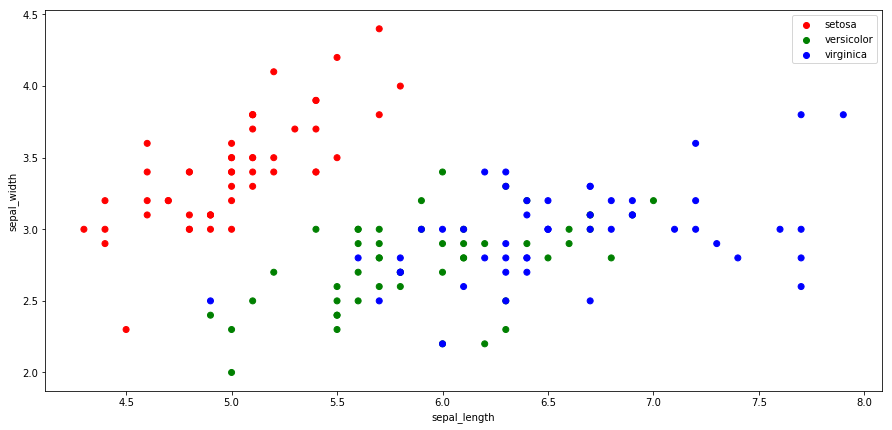

In [9]:
import matplotlib

my_colors = ["red", "green", "blue"]

p = plt.scatter(x=data["sepal_length"],
                y=data["sepal_width"],
                c=data["target"],
                cmap=matplotlib.colors.ListedColormap(my_colors))
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

## Fix my legend
plt.legend((p,p,p), (iris.target_names))
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[0].set_color(my_colors[0])
legend.legendHandles[1].set_color(my_colors[1])
legend.legendHandles[2].set_color(my_colors[2])

### Voronoi plot

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html

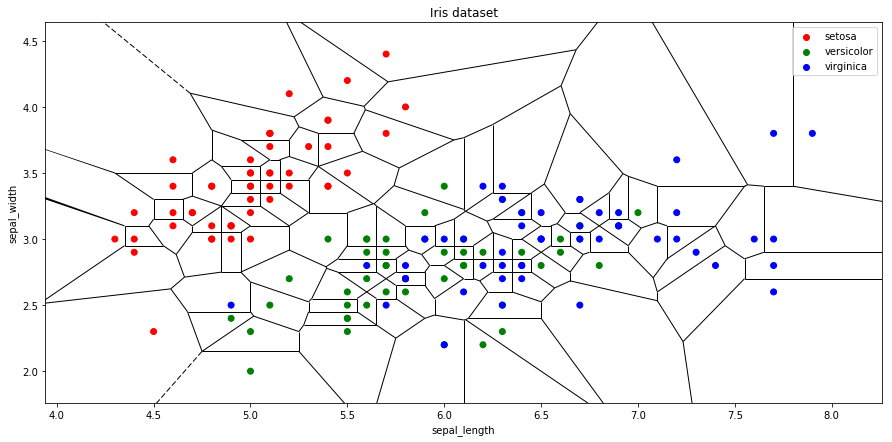

In [10]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(points)

## Draw boundaries
voronoi_plot_2d(vor, show_vertices=False, show_points=False)

## Add color to points
plt.scatter(x=data["sepal_length"],
            y=data["sepal_width"],
            c=data["target"],
            cmap=matplotlib.colors.ListedColormap(my_colors))

plt.xlabel(points.columns[0])
plt.ylabel(points.columns[1])
plt.title("Iris dataset")

## Fix my legend
plt.legend((p,p,p), (iris.target_names))
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[0].set_color(my_colors[0])
legend.legendHandles[1].set_color(my_colors[1])
legend.legendHandles[2].set_color(my_colors[2])
plt.show()